# CREDIT CARD FRAUD DETECTION
### <h2>Introduction of dataset</h2>
 The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

 It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

![IMAGE](https://www.eastwestbank.com/ReachFurther/NewsArticleStore/519/Credit-card-fraud-top.jpg)

### Objectives
The objectives of credit card fraud detection are to reduce losses due to payment fraud for both merchants and issuing banks and increase revenue opportunities for merchants.
### Attribute Information
1. Time
2.  V1
3. V2
4. V3
5. V4
6. V5
7. V6
8. V7
9. V8
10. V9
11. V10
12. V11
13. V12
14. V13
15. V14
16. V15
17. V16
18. V17
19. V18
20. V19
21. V20
22. V21
23. V22
24. V23
25. V24
26. V25
27. V26
28. V27
29. V28
30. Amount
31. Class


In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### Importing all libraries for analysis of dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from matplotlib import gridspec

### Reading csv file 

In [3]:
data=pd.read_csv("E:\\creditcard.csv")

### First 10 rows of dataset

In [4]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Cardholders details can not be shared becuause these are confidential therefore above dataset conteains features which is converted by PCA i.e. Principal Component Analysis

### Shape and size of dataset

In [5]:
print "Shape of dataset",data.shape
print "Size of dataset",data.size

Shape of dataset (284807, 31)
Size of dataset 8829017


### Describing all statistical parameters using describe function

In [6]:
data.describe(include="all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Checking for null values in a dataset

In [7]:
data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Checking unique values for class variable

In [8]:
data["Class"].unique()

array([0, 1], dtype=int64)

### Taking 0.1 fraction of dataset for prediction as our dataset have 284807 rows

In [9]:
data1=data.sample(frac=0.1,random_state=1)
data1.shape

(28481, 31)

### First 10 rows of dataset

In [10]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## EXPLORATORY DATA ANALYSIS

![IMAGE](https://www.eastwestbank.com/ReachFurther/NewsArticleStore/519/Online-credit-card-fraud.jpg)

## UNIVARIATE ANALYSIS
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data. Univariate plots gives us the ideas of present outlliers in data and it also helps in bivariate and multivariate analysis.

C:\ProgramData\Anaconda21\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda21\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda21\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda21\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda21\lib\site-packages\matplotlib\axes\_axe

C:\ProgramData\Anaconda21\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda21\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda21\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda21\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda21\lib\site-packages\matplotlib\axes\_axe

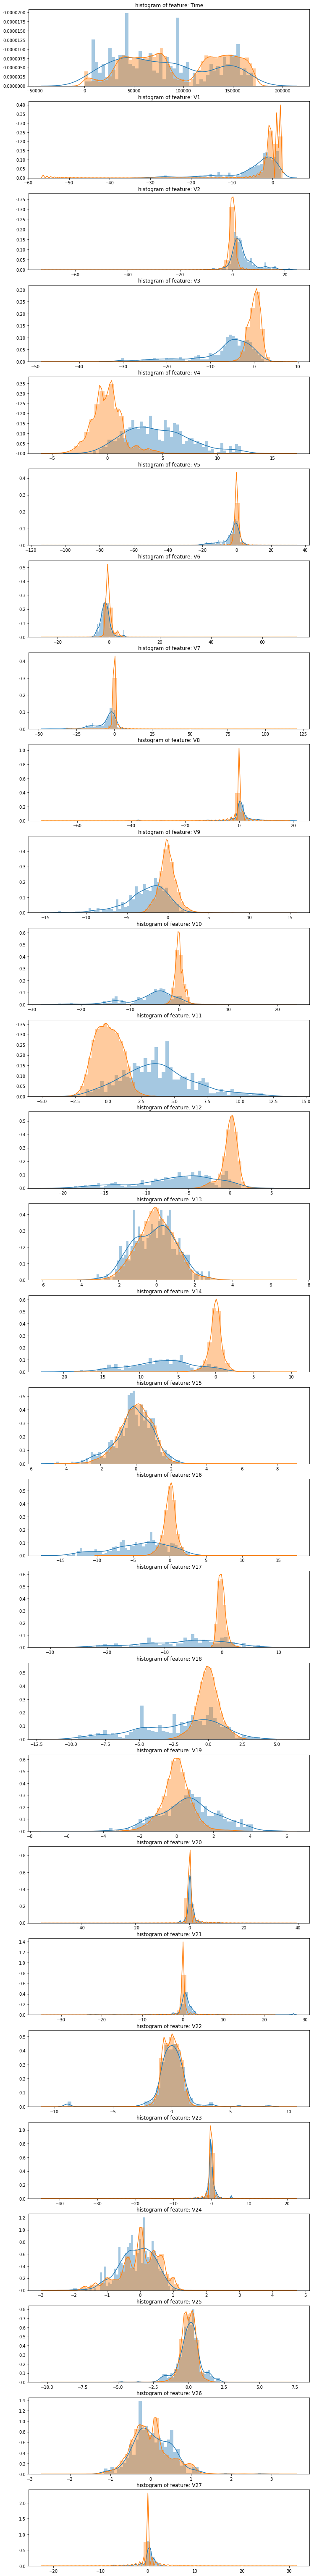

In [12]:
features = data.iloc[:,0:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(data[c][data.Class == 1], bins=50)
 sns.distplot(data[c][data.Class == 0], bins=50)
 ax.set_xlabel("")
 ax.set_title("histogram of feature: " + str(c))
plt.show()

C:\ProgramData\Anaconda21\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


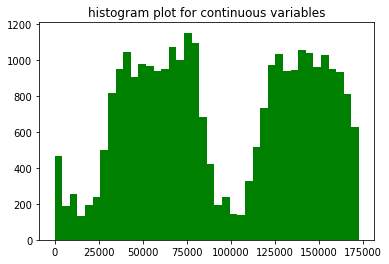

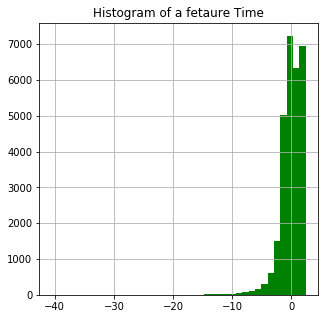

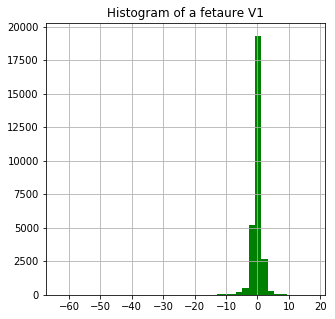

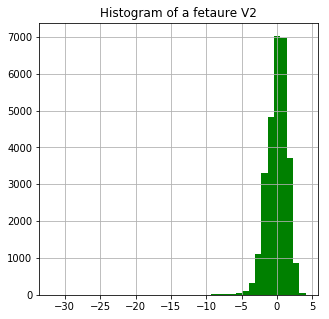

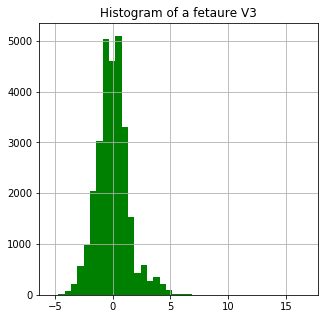

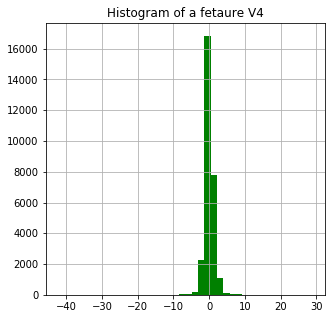

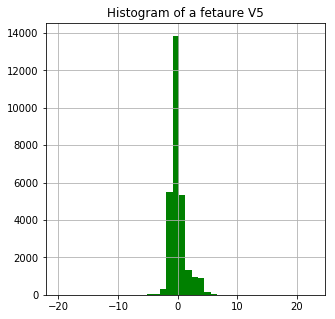

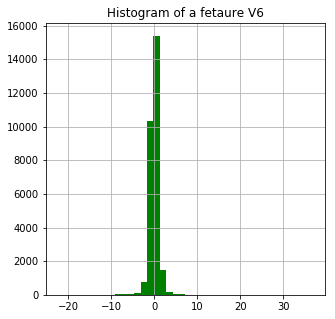

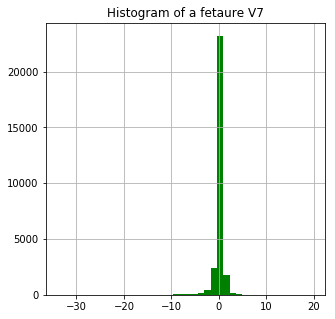

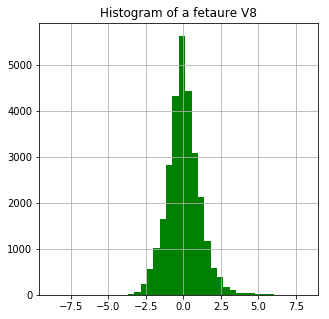

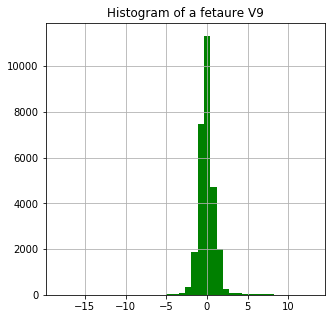

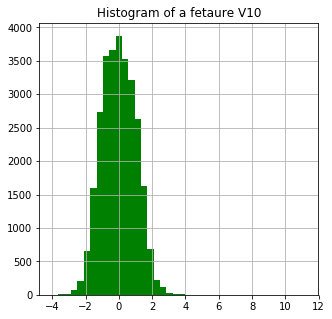

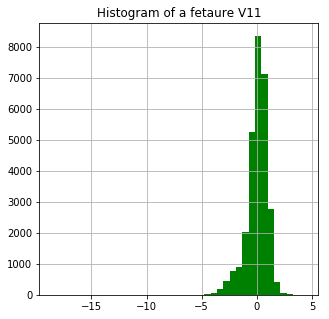

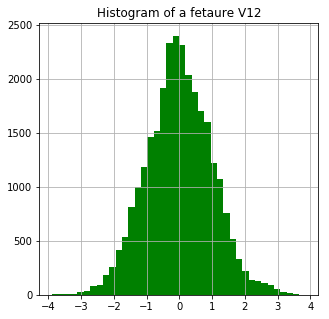

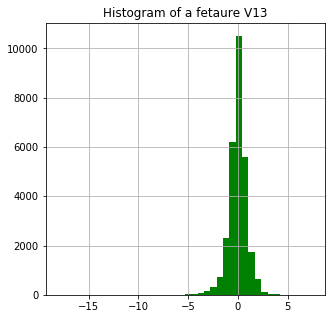

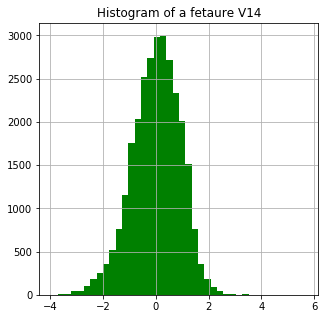

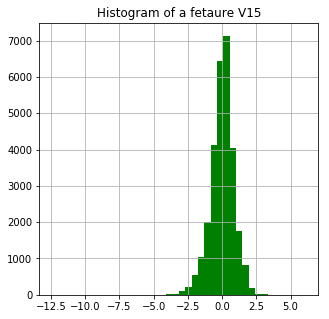

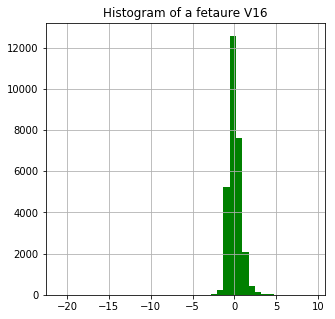

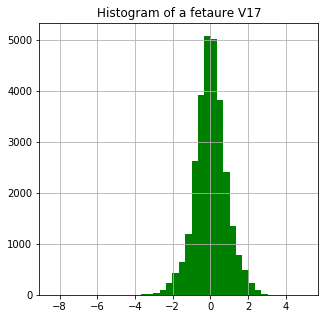

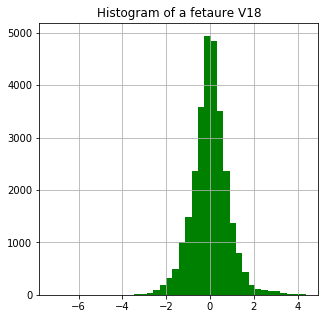

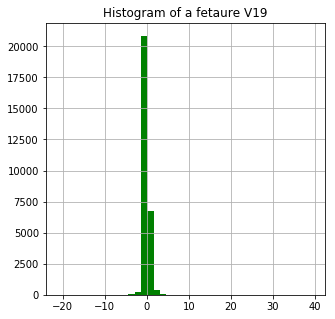

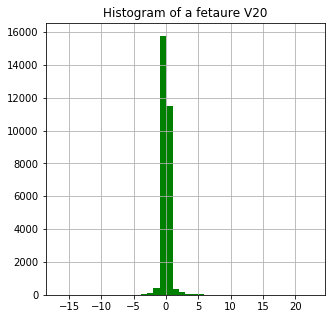

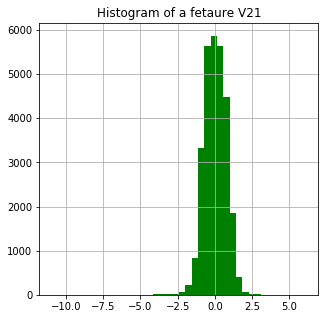

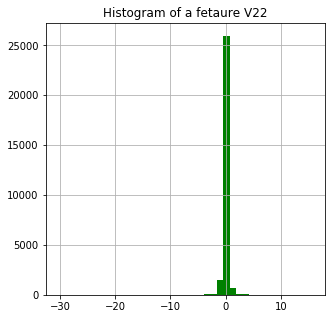

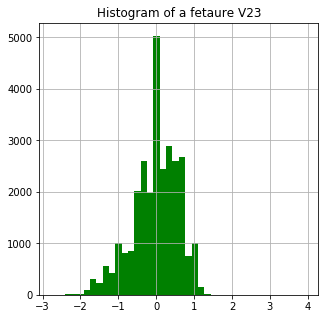

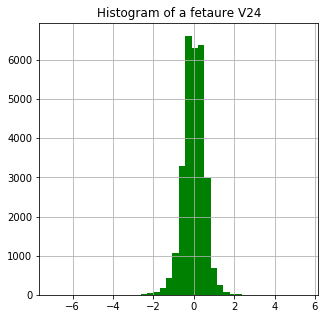

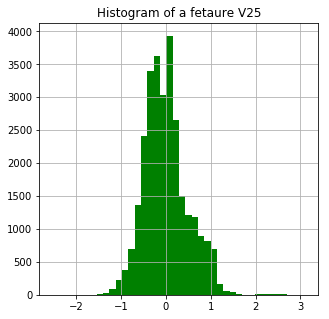

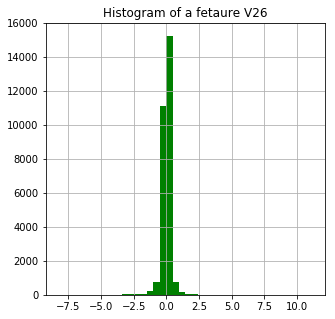

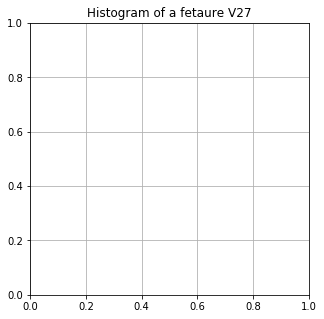

In [11]:
list=["Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27"]
plt.title("histogram plot for continuous variables")
for i in list:
    
    
    plt.hist(x=i,data=data1,bins=40,color="green")
    plt.figure(figsize=(5,5))
    plt.grid()
    plt.title("Histogram of a fetaure " + str(i))
    

### Above we plot the histogram for all attributed except amount, class variable. Because class variable is ordinal variable so count plot is plot for class variable

#### Count plot of Class variable

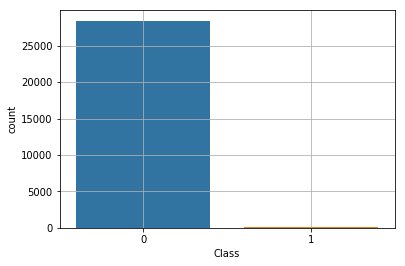

In [12]:
sns.countplot(x=data1["Class"],data=data1)
plt.grid()

#### Inferences from above plot
Number of fraud transactions are very as compared to valid transactions

#### Distribution plot of amount variable

C:\ProgramData\Anaconda21\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


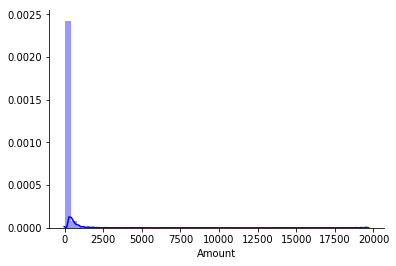

In [13]:
sns.distplot(data1['Amount'],color='blue',hist=True)
sns.despine()

#### Calculating number of fraud tranactions and valid transactions

In [14]:
fraud=data[data['Class']==1]
valid=data[data['Class']==0]
outlier_fraction=len(fraud)/float(len(valid))
print outlier_fraction
print "fraud cases {}".format(len(fraud))
print "Valid cases {}".format(len(valid))

0.00173047500132
fraud cases 492
Valid cases 284315


In [21]:
print("Amount details of fraudulent transaction")
fraud.Amount.describe()

Amount details of fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

## BIVARIATE ANALYSIS
Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

### CORRELATION
#### 'Correlation' refers to a mutual relationship or association b/w differnt quantites.

#### Here we calculate correlation i.e statistical parameter of dataset which gives us relatioship b/w differnt quantities.


In [16]:
data1.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.126475,-0.001584,-0.413547,-0.104527,0.182205,-0.060483,0.078924,-0.040474,-0.008428,...,0.041323,0.150603,0.047941,-0.020018,-0.229491,-0.048131,-0.005541,-0.004339,-0.026969,-0.005087
V1,0.126475,1.000000,0.048796,0.015452,-0.010592,0.019888,0.006417,-0.020583,-0.003013,0.001658,...,-0.016415,0.014896,0.049447,-0.003709,0.014055,0.007203,-0.011545,0.085035,-0.262703,-0.079820
V2,-0.001584,0.048796,1.000000,0.027270,-0.022539,0.009666,-0.004411,-0.013456,0.015662,0.003456,...,-0.020127,0.021923,0.047591,-0.011386,0.011838,0.005366,-0.009611,0.084873,-0.556401,0.069598
V3,-0.413547,0.015452,0.027270,1.000000,-0.005423,0.013997,-0.006903,-0.024640,-0.025529,0.002525,...,-0.006083,0.014177,0.042603,-0.001883,0.005975,0.006869,-0.017094,0.029973,-0.225099,-0.160051
V4,-0.104527,-0.010592,-0.022539,-0.005423,1.000000,-0.003708,0.002029,0.004432,0.011659,-0.004395,...,-0.004423,-0.011251,-0.017682,0.001829,-0.009692,0.004087,0.024489,-0.024554,0.111692,0.122631
V5,0.182205,0.019888,0.009666,0.013997,-0.003708,1.000000,-0.016656,-0.037463,-0.013263,-0.008506,...,0.002288,0.022065,0.064703,-0.007184,0.006493,0.000048,-0.027934,0.010991,-0.397437,-0.073519
V6,-0.060483,0.006417,-0.004411,-0.006903,0.002029,-0.016656,1.000000,0.006923,0.003695,-0.002762,...,0.004490,-0.003705,-0.036726,0.001428,-0.015012,0.009938,-0.004811,-0.009772,0.213007,-0.035085
V7,0.078924,-0.020583,-0.013456,-0.024640,0.004432,-0.037463,0.006923,1.000000,-0.028291,-0.005510,...,0.007012,-0.013871,-0.055242,0.002899,-0.016941,-0.000075,-0.012973,-0.037593,0.417814,-0.134247
V8,-0.040474,-0.003013,0.015662,-0.025529,0.011659,-0.013263,0.003695,-0.028291,1.000000,-0.018645,...,-0.005651,-0.004195,0.030092,-0.008821,0.017298,0.015385,0.008495,0.015525,-0.102221,0.024896
V9,-0.008428,0.001658,0.003456,0.002525,-0.004395,-0.008506,-0.002762,-0.005510,-0.018645,1.000000,...,0.009462,-0.002297,0.002360,0.007441,-0.009149,-0.003652,-0.011701,-0.026290,-0.039773,-0.079962


#### Heatmap representing correlation values in a graphical way.


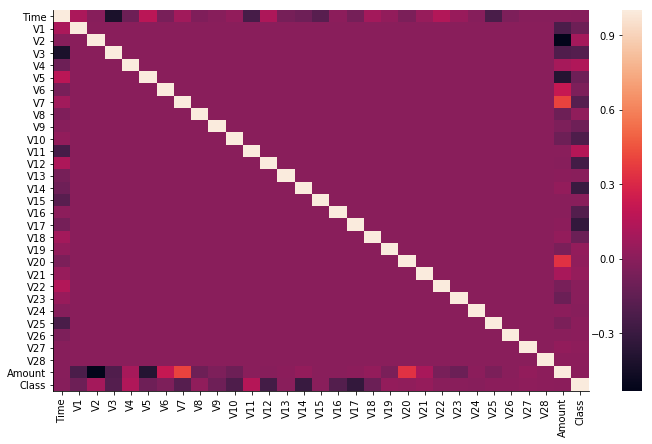

In [17]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr())
sns.despine()

Text(0.5,1,'Class Vs V3 plot')

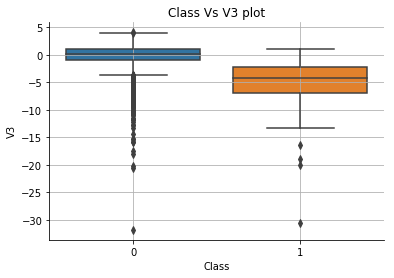

In [51]:
sns.boxplot(x='Class',y='V3',data=data1)
plt.grid()
sns.despine()
plt.title("Class Vs V3 plot")

Text(0.5,1,'Class Vs amount plot')

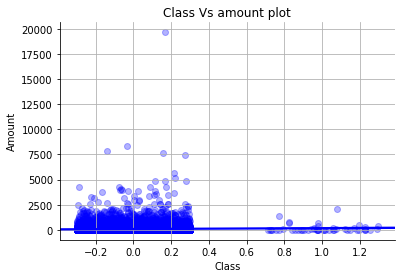

In [18]:
sns.regplot(x='Class',y='Amount',data=data1,x_jitter=0.3,scatter_kws={'alpha':0.3},color="blue")
sns.despine()
plt.grid()
plt.title("Class Vs amount plot")

In [20]:
#Filter the column to remove data that we don't want in training dataset
train=data1.drop(['Class','Time'],axis=1)
label=data1['Class']
#print the shapes of train and label dataframes
print "shape of train dataframe",train.shape
print "shape of label dataframe",label.shape

shape of train dataframe (28481, 29)
shape of label dataframe (28481,)


## MODEL PREPARATION

#### Importing algorithms for training of dataset

In [21]:
#importing all the models that we use to classify credit card is fraudelent or not
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression


#### Making a classifier for localoutlier fraction and isolation forest algorithm

In [22]:
#define a random state
state=1
classifiers={
     "Isolation forest": IsolationForest(max_samples=len(train),contamination=outlier_fraction,random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)
}
y=data1["Class"]

#### Fitting the data into model and predict the output variable i.e. class 

[0 0 0 ... 0 0 0]
Local Outlier Factor: 77
Accuracy score 
0.9972964432428637
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.22      0.22      0.22        49

avg / total       1.00      1.00      1.00     28481

[0 0 0 ... 0 0 0]
Isolation forest: 75
Accuracy score 
0.9973666654962958
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.24      0.24      0.24        49

avg / total       1.00      1.00      1.00     28481



C:\ProgramData\Anaconda21\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


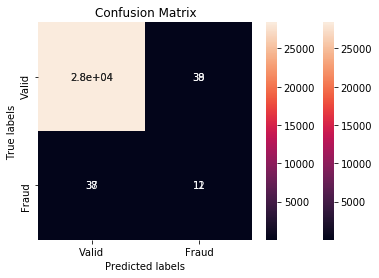

In [23]:
#fit the model
n_outliers=len(fraud)
for i,(clf_name,clf) in enumerate(classifiers.items()):
    #fit the data and tag outliers
    if clf_name=="Local Outlier Factor":
        y_pred=clf.fit_predict(train)
        #scored prediction
        scores_pred=clf.negative_outlier_factor_
    else:
        clf.fit(train)
        #scores prediction
        scores_predict=clf.decision_function(train)
        y_pred=clf.predict(train)
    
        
   #Reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred==1] = 0
    y_pred[y_pred==-1] = 1
    
    n_error=(y_pred!=label).sum()
    
    # Run classificaton metrics
    print y_pred
    print('{}: {}'.format(clf_name,n_error))
    print("Accuracy score ")
    print(accuracy_score(label,y_pred))
    print(classification_report(label,y_pred))
    cm=confusion_matrix(label,y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); 

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels') 
    ax.set_title('Confusion Matrix') 
    ax.xaxis.set_ticklabels(['Valid', 'Fraud'])
    ax.yaxis.set_ticklabels(['Valid', 'Fraud'])

#### Logistic Regression Model

In [26]:
# Importing LinearRegression model from sklearn
from sklearn.linear_model import LogisticRegression

# Importing train_test_split function from sklearn.cross_validation
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda21\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
x_train , x_test , y_train , y_test = train_test_split(train , label , test_size=0.2 , random_state=42)
reg=LogisticRegression()

import time
start=time.time()

#Fitting training data into model
reg.fit(x_train,y_train)
end=time.time()
print "Time to train model=", end-start

# Score of LinarRegression model
print "Score of LogisticRegression model=",reg.score(x_test,y_test)

Time to train model= 0.894999980927
Score of LogisticRegression model= 0.9991223450939091


[Text(0,0.5,'Valid'), Text(0,1.5,'Fraud')]

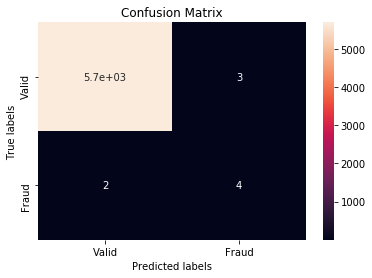

In [28]:
y_pred=reg.predict(x_test)
cm=confusion_matrix(y_pred,y_test)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Valid', 'Fraud'])
ax.yaxis.set_ticklabels(['Valid', 'Fraud'])

## Conclusion
LogisticRegression gives accuracy of 0.9987 and isolation forest and local outlier fraction work gives accuracy of 0.9977.
Logistic Regression gives more accuracy as compared to isloation forest and local outlier fraction

In [29]:
from sklearn.ensemble import RandomForestClassifier
rnf=RandomForestClassifier()
rnf.fit(x_train,y_train)
pred=rnf.predict(x_test)



In [30]:
#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers = len(fraud)
n_errors = (pred != y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(y_test,pred)
print("The accuracy is {}".format(acc))
prec= precision_score(y_test,pred)
print("The precision is {}".format(prec))
rec= recall_score(y_test,pred)
print("The recall is {}".format(rec))
f1= f1_score(y_test,pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(y_test,pred)
print('The Matthews correlation coefficient is{}'.format(MCC))

The model used is Random Forest classifier
The accuracy is 0.999122345094
The precision is 0.666666666667
The recall is 0.571428571429
The F1-Score is 0.615384615385
The Matthews correlation coefficient is0.616779546927


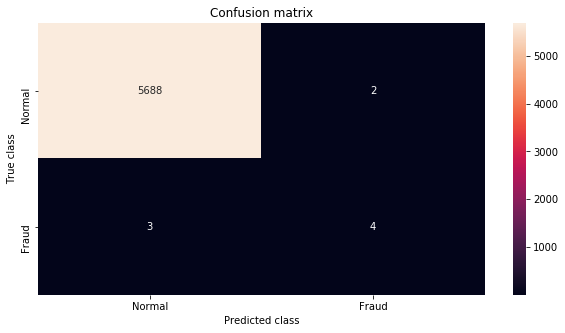

In [34]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [40]:
!pip2 install pydot

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
